# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

- `crim`: per capita crime rate by town  
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft  
- `indus`: proportion of non-retail business acres per town   
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
- `nox`: nitrogen oxide concentration (parts per 10 million)   
- `rm`: average number of rooms per dwelling   
- `age`: proportion of owner-occupied units built prior to 1940  
- `dis`: weighted mean of distances to five Boston employment centers   
- `rad`: index of accessibility to radial highways   
- `tax`: full-value property-tax rate per \$10,000   
- `ptratio`: pupil-teacher ratio by town    
- `b`: 1000(Bk - 0.63)^2 where Bk is the proportion of African American individuals by town   
- `lstat`: lower status of the population (percent)   
- `medv`: median value of owner-occupied homes in $10000s 
  
    
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


In [2]:
# Def functions for correlation and covariance
import pandas as pd
import math
from collections import Counter
import matplotlib
%matplotlib inline


def mean_normalize(data):
    mean = sum(data) / len(data)
    normalized_mean = [x - mean for x in data]
    return normalized_mean

def dot_product(x, y):
    return sum([tup[0]*tup[1] for tup in zip(x, y)])

def covariance(var1, var2):
    return dot_product(mean_normalize(var1), mean_normalize(var2)) / (len(var1) -1)

def correlation(var1, var2):
    var1_norm_mean = mean_normalize(var1)
    var2_norm_mean = mean_normalize(var2)
    var1_denom = sum([x**2 for x in var1_norm_mean])
    var2_denom = sum([y**2 for y in var2_norm_mean])
    return dot_product(var1_norm_mean, var2_norm_mean) / math.sqrt(var1_denom * var2_denom)

def get_mean(data):
    return sum(data) / len(data)

def get_median(data):
    data.sort()
    if len(data) % 2 == 0:
        first = len(data) / 2
        second = first + 1
        return (first + second) / 2
    else:
        index = len(data) // 2
        return data[index]
    
def get_mode(data):
    c = Counter(data)
    return [x for x, v in c.items() if v == max(c.values())]

In [3]:
# Loading the data (which is stored in the file 'train.csv')
df = pd.read_csv('train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
b          333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables

Mean: 18.448048048047994
Median: 0.26169000000000003
Mode: [0.01501]


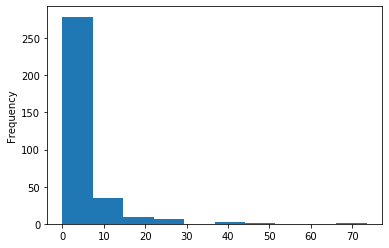

In [5]:
# How are the ptratios distributed? 
# What is the mean, median and mode of ptratio?
var_values = df.ptratio.values

# ptratio mean
print(f'Mean: {get_mean(var_values)}')

# # ptratio median
print(f'Median: {get_median(df.crim.values)}')

# # ptratio mode
print(f'Mode: {get_mode(df.crim.values)}') 

df.crim.plot(kind='hist');

Mean: 3.360341471471472
Median: 0.26169000000000003
Mode: [0.01501]


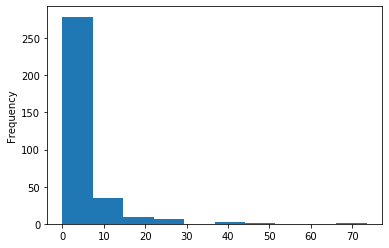

In [6]:
# How is the crim var distributed? 
# What is the mean, median and mode of crim?
var_values = df.crim.values

# crim mean
print(f'Mean: {get_mean(var_values)}')

# # crim median
print(f'Median: {get_median(df.crim.values)}')

# # crim mode
print(f'Mode: {get_mode(df.crim.values)}')

df.crim.plot(kind='hist');

Mean: 68.22642642642641
Median: 76.7
Mode: [100.0]


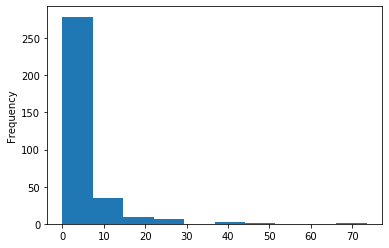

In [7]:
# How is the age var distributed? 
# What is the mean, median and mode of age?
var_values = df.age.values

# age mean
print(f'Mean: {get_mean(var_values)}') # 3.360341471471472

# # age median
print(f'Median: {get_median(df.age.values)}') # 0.26169000000000003

# # age mode
print(f'Mode: {get_mode(df.age.values)}') # [0.01501]

df.crim.plot(kind='hist');

Mean: 0.557144144144145
Median: 0.5379999999999999
Mode: [0.5379999999999999, 0.713]


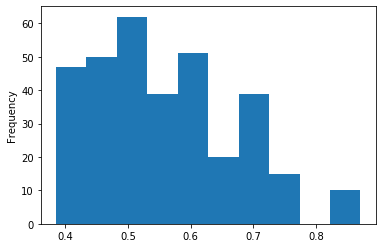

In [11]:
# How is the nox var distributed? 
# What is the mean, median and mode of nox?
var_values = df.nox.values

# nox mean
print(f'Mean: {get_mean(var_values)}') # 3.360341471471472

# nox median
print(f'Median: {get_median(df.nox.values)}') # 0.26169000000000003

# nox mode
print(f'Mode: {get_mode(df.nox.values)}') # [0.01501]

df.nox.plot(kind='hist');

Mean: 11.29348348348346
Median: 0.26169000000000003
Mode: [0.01501]


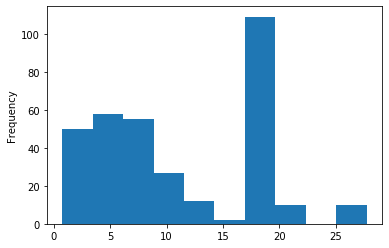

In [9]:
# How is the indus var distributed? 
# What is the mean, median and mode of nox?
var_values = df.indus.values

# indus mean
print(f'Mean: {get_mean(var_values)}') # 3.360341471471472

# indus median
print(f'Median: {get_median(df.crim.values)}') # 0.26169000000000003

# indus mode
print(f'Mode: {get_mode(df.crim.values)}') # [0.01501]

df.indus.plot(kind='hist');

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,333.0,250.951952,147.859438,1.00000,123.00000,244.00000,377.00000,506.0000
crim,333.0,3.360341,7.352272,0.00632,0.07896,0.26169,3.67822,73.5341
zn,333.0,10.689189,22.674762,0.00000,0.00000,0.00000,12.50000,100.0000
indus,333.0,11.293483,6.998123,0.74000,5.13000,9.90000,18.10000,27.7400
chas,333.0,0.060060,0.237956,0.00000,0.00000,0.00000,0.00000,1.0000
nox,333.0,0.557144,0.114955,0.38500,0.45300,0.53800,0.63100,0.8710
rm,333.0,6.265619,0.703952,3.56100,5.88400,6.20200,6.59500,8.7250
age,333.0,68.226426,28.133344,6.00000,45.40000,76.70000,93.80000,100.0000
dis,333.0,3.709934,1.981123,1.12960,2.12240,3.09230,5.11670,10.7103
rad,333.0,9.633634,8.742174,1.00000,4.00000,5.00000,24.00000,24.0000


Create meaningful subsets of the data using selection operations like .loc, .iloc, or related operations.

In [11]:
crime_over_fifteen = df.loc[(df.crim > 15)]
crime_over_fifteen.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
314,479,15.0234,0.0,18.1,0,0.614,6.185,96.7,2.1705,24,666,20.2,379.70,18.03,14.6
315,480,15.1772,0.0,18.1,0,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
316,481,15.2880,0.0,18.1,0,0.532,6.242,64.7,3.4242,24,666,20.2,396.90,10.74,23.0
317,482,15.5757,0.0,18.1,0,0.532,6.750,74.9,3.3317,24,666,20.2,393.07,7.74,23.7
318,484,15.8603,0.0,18.1,0,0.532,5.762,40.3,4.0983,24,666,20.2,392.92,10.42,21.8


In [13]:
crime_under_fifteen = df.loc[(df.crim >= 15) & (df.age > 18]
crime_under_fifteen.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
314,479,15.0234,0.0,18.1,0,0.74,6.185,100.0,2.1705,24,666,20.2,379.70,18.03,14.6
315,480,15.1772,0.0,18.1,0,0.74,6.229,100.0,1.9512,24,666,20.2,383.32,13.11,21.4
316,481,15.2880,0.0,18.1,0,0.74,6.242,100.0,3.4242,24,666,20.2,396.90,10.74,23.0
317,482,15.5757,0.0,18.1,0,0.77,6.750,100.0,3.3317,24,666,20.2,393.07,7.74,23.7
318,484,15.8603,0.0,18.1,0,0.77,5.762,100.0,4.0983,24,666,20.2,392.92,10.42,21.8


In [48]:
indus_nox = df[['indus', 'nox']]
indus_nox.head()

,indus,nox
0,2.31,0.538
1,7.07,0.469
2,2.18,0.458
3,2.18,0.458
4,7.87,0.524


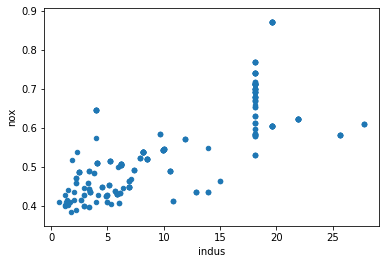

In [14]:
indus_nox.plot.scatter('indus', 'nox');

In [15]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler() 
# indus_nox_scaled = pd.DataFrame(scaler.fit_transform(indus_nox), columns=['indus', 'nox'])
# indus_nox_scaled.plot.scatter('indus', 'nox');

In [21]:
indus_nox_chas = df[['indus', 'nox', 'chas']]

Explain why you used the chosen subsets and do this for three possible 2-way splits.

I created a subset of the data called crime_over_fifteen and crime_under_fifteen because I noticed that there were some cases where the crime was much higher than the median. By splitting them I can calculate and compare measures of centrality between the normal data v.s. the outlier data to begin to understand if there's a correlation between high crime rates and other variables in the data.

I also created a subset dataframe called indus_nox that has contains all rows for those two variables. Using a scatter plot I can see if there's is a correlation between highly industrial suburbs of Boston and nitrogen oxide levels.

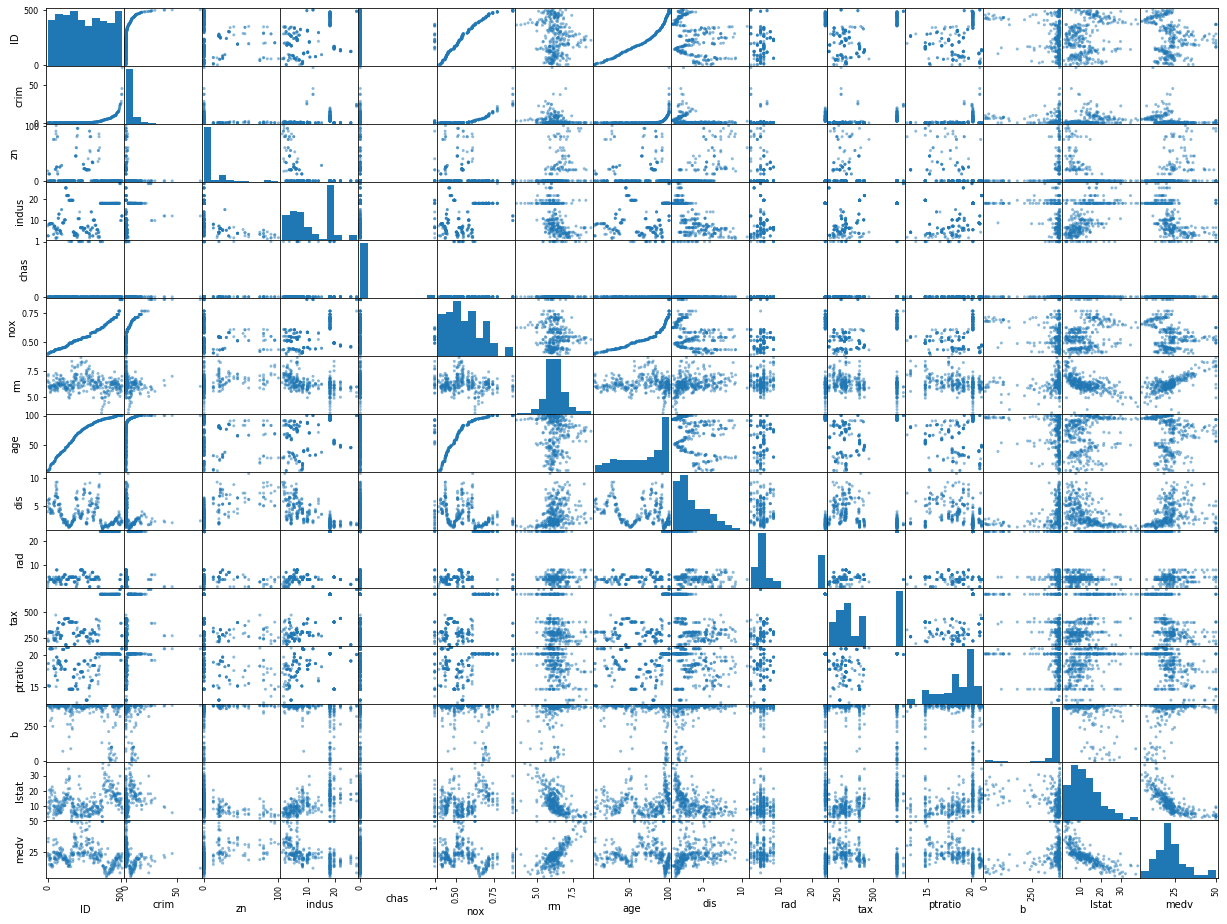

In [19]:
# Try a scatter matrix in a for loop and look at variable relationships
pd.plotting.scatter_matrix(df, figsize=(21, 16));

In [22]:
df.corr() > .75

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
ID,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False
crim,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
zn,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
indus,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
chas,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
nox,True,True,False,False,False,True,False,True,False,False,False,False,False,False,False
rm,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
age,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False
dis,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
rad,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False


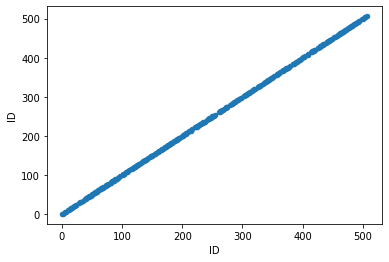

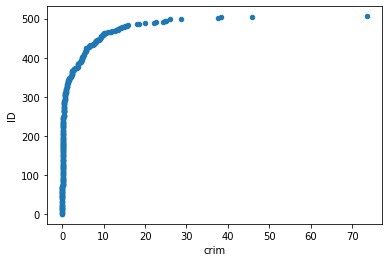

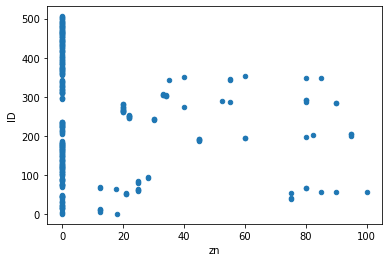

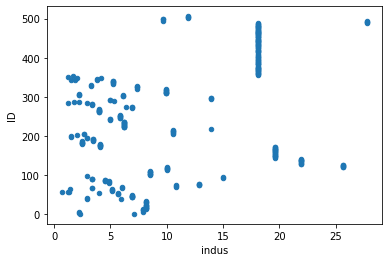

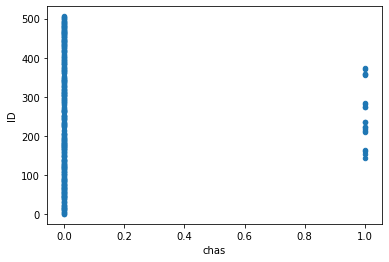

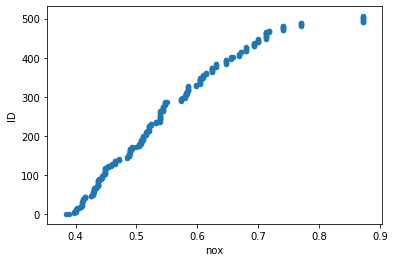

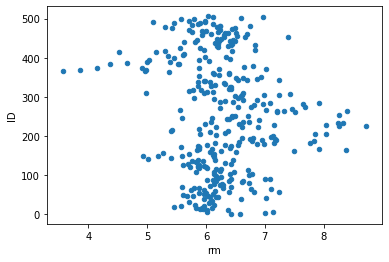

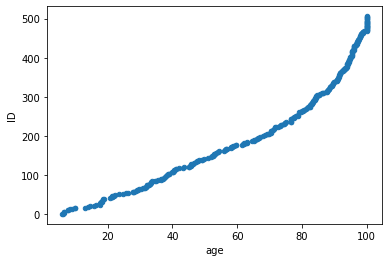

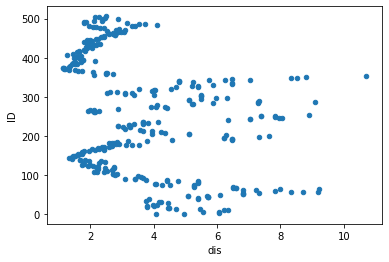

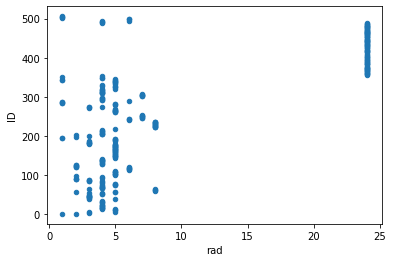

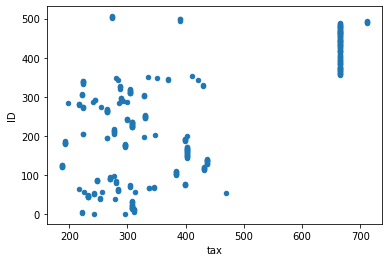

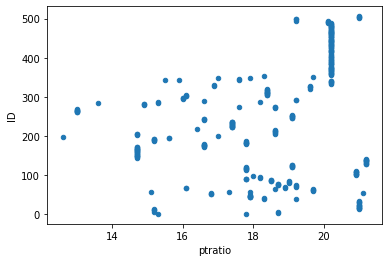

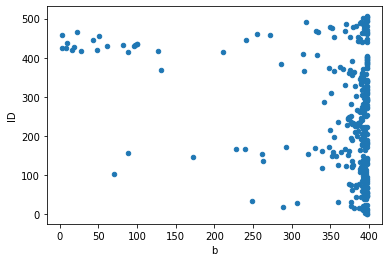

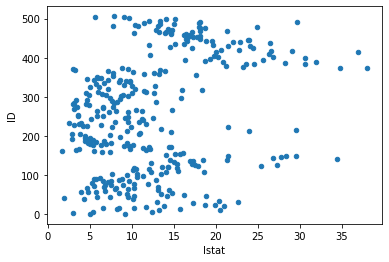

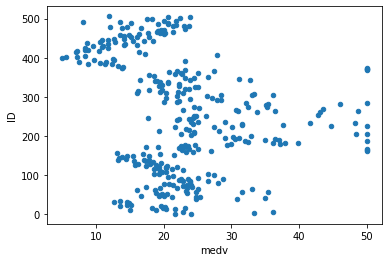

In [20]:
for column in df.columns:
    for i, column_2 in enumerate(df.columns):
        df.plot.scatter(column, column_2)

By plotting the indus_nox_chas dataframe in a scatter_matrix, we see that proximity to the Charles River could indicate a correlation between nox and chas variables. Further analysis is needed. Let's compare the means of the subsets by_river and not_by_river:

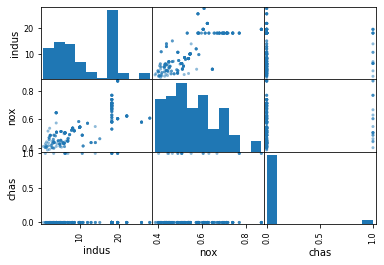

In [46]:
# State how you think the two measures of centrality and/or dispersion 
# might be different for each subset of the data.
pd.plotting.scatter_matrix(indus_nox_chas);

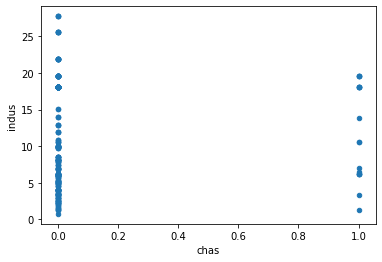

In [14]:
df.plot.scatter('chas', 'indus');

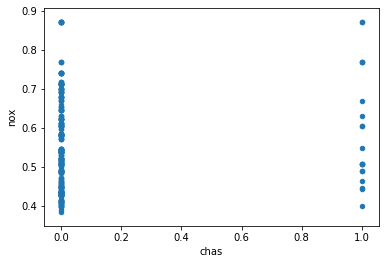

In [38]:
df.plot.scatter('chas', 'nox');

In [43]:
by_river = df.loc[df.chas == 0]
not_by_river = df.loc[df.chas == 1]
nox_std_dev = df.nox.std()

0.11495450830289299

The mean of the nox where suburb borders the river:

In [40]:
by_river.nox.mean()

0.5548150159744419

The mean of the nox where suburb **doesn't** border river:

In [41]:
not_by_river.nox.mean()

0.5935949999999999

How many std_devs away from the mean are the cases where the suburb **doesn't** border the river?

In [45]:
abs((by_river.nox.mean() - not_by_river.nox.mean()) / nox_std_dev)

0.33735070157819974

A difference of only .337 std_devs between cases where by_river and not_by_river indicates that chas variable does contribute to nox levels in suburbs but isn't a the only contributing factor.

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!